# 🏠California Housing Price Prediction 

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


let's load our data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data, housing.target, random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [5]:
len(X_train_full)

15480

In [7]:
len(X_test)

5160

In [9]:
len(X_valid)

3870

In [11]:
len(X_train)

11610

In [14]:
X_train

array([[   3.5214    ,   15.        ,    3.04994451, ...,    1.60599334,
          37.63      , -122.43      ],
       [   5.3275    ,    5.        ,    6.49005964, ...,    3.44333996,
          33.69      , -117.39      ],
       [   3.1       ,   29.        ,    7.54237288, ...,    2.25084746,
          38.44      , -122.98      ],
       ...,
       [   1.5561    ,   35.        ,    4.13993174, ...,    3.27645051,
          34.11      , -117.29      ],
       [   2.1055    ,   52.        ,    5.17849462, ...,    2.92688172,
          36.76      , -119.79      ],
       [   5.6022    ,   31.        ,    6.21971253, ...,    2.53798768,
          38.04      , -122.2       ]])

In [13]:
#convert X_train into dataframe with attributes name
df_train=pd.DataFrame(X_train, columns=housing.feature_names)

#print the dataframe
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


Lets us standardize the data

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

let us now define the model architecture

In [17]:
X_train.shape[1:]

(8,)

In [24]:
model=keras.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
    
])

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=0.005))
history=model.fit(X_train,y_train,epochs=60, validation_data=(X_valid,y_valid))

Epoch 1/60


C:\Users\Ayush Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7438 - val_loss: 0.5587
Epoch 2/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5702 - val_loss: 0.4370
Epoch 3/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4727 - val_loss: 0.3966
Epoch 4/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4319 - val_loss: 0.3729
Epoch 5/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4112 - val_loss: 0.3618
Epoch 6/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3988 - val_loss: 0.3551
Epoch 7/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3900 - val_loss: 0.3525
Epoch 8/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3833 - val_loss: 0.3458
Epoch 9/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3780 - val_loss: 0.3432
Epoch 10/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3734 - val_loss: 0.3391
Epoch 11/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3693 - val_loss: 0.3367
Epoch 12/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

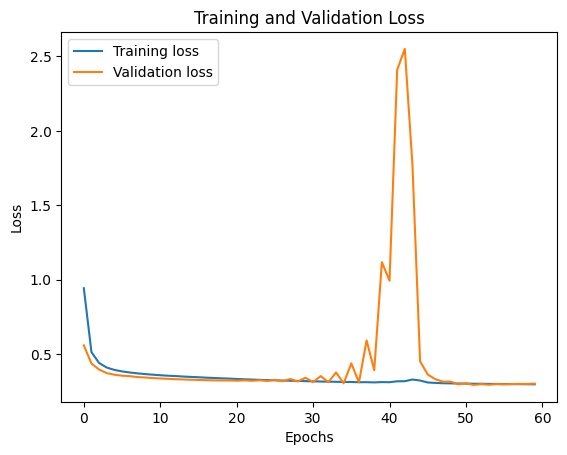

In [25]:
#plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
#Evaluate the model on the test set
mse_test = model.evaluate(X_test,y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.3023


In [27]:

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Sample 1:
Predicted: 0.6088423728942871
Actual: 0.477
Sample 2:
Predicted: 1.42559814453125
Actual: 0.458
Sample 3:
Predicted: 4.5456862449646
Actual: 5.00001
